# first exercise

We define a function which counts the number of lines for each files in specifique format in a specifique directory.
To count the number of lines for a file, we count the '\n' in the file. We read the file block by block so that it can fit in RAM.

In [1]:
import glob
def blocks(files, size=65536):
    while True:
        b = files.read(size)
        if not b:break
        yield b
        
def countLine(files):
    with open(files, 'r') as f:
        return sum(bl.count('\n') for bl in blocks(f))

def countLineForEach(directory, format_f):
    name = directory + '\\**\*.' + format_f
    for filename in glob.iglob(name, recursive=True):
        print(filename + ' :\n' + str(countLine(filename)) + '  lines')
 
directory = 'C:\\Users\\XIA\\Desktop\\amadeus_test'
format_f = 'csv'
countLineForEach(directory, format_f)

C:\Users\XIA\Desktop\amadeus_test\data\bookings.csv :
10000011  lines
C:\Users\XIA\Desktop\amadeus_test\data\searches.csv :
20390198  lines


# second exercise

In the following, a piece of the data is visulized to get a raw understanding of the data.

In [1]:
import pandas as pd
###set the maximum number of columns that can be shown
pd.set_option('display.max_columns', 100)

data_piece = pd.read_csv('C:\\Users\\XIA\\Desktop\\amadeus_test\\data\\bookings.csv', nrows = 5, engine='python', sep='^')
data_piece.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKL,AKL,NZ,SVO,MOW,RU,AKLSVO,AKLMOW,NZRU,1,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKLSVO,AKLMOW,NZRU,1,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [2]:
data_piece = pd.read_csv('C:\\Users\\XIA\\Desktop\\amadeus_test\\data\\searches.csv', nrows = 5, engine='python', sep='^')
data_piece.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In order to make it fit to memory and accelerate the speed, only useful columns are read.

In [5]:
import numpy as np
import pandas as pd
def topNArr(file_dir, n=10):
    year = 2013
    data_booking = pd.read_csv(file_dir, sep='^', usecols=['arr_port','arr_city','year','pax'])
    data = data_booking
    data_booking = data_booking[data_booking['year']==year]
    data_booking = data_booking.groupby(['arr_port','arr_city']).agg(np.sum)['pax']
    top_n = data_booking.nlargest(n)
    return top_n

file_dir = 'C:\\Users\\XIA\\Desktop\\amadeus_test\\data\\bookings.csv'
top_n = topNArr(file_dir)
top_n.head(10)

arr_port  arr_city
LHR       LON         88809
MCO       ORL         70930
LAX       LAX         70530
LAS       LAS         69630
JFK       NYC         66270
CDG       PAR         64490
BKK       BKK         59460
MIA       MIA         58150
SFO       SFO         58000
DXB       DXB         55590
Name: pax, dtype: float64

# Third exercise 

The function returns the monthly searches number for flights arriving at aiports defined in IATAs.

In [4]:
def monthlySearch(file_dir, IATAs):
    data = pd.read_csv(file_dir, sep='^', usecols=['Destination','Date'])
    data = data[data['Destination'].isin(IATAs)]
    data['Date'] = pd.to_datetime(data['Date'])
    data['year'] = data['Date'].dt.year
    data['month'] = data['Date'].dt.month
    res = data.groupby(['Destination', 'year','month']).size()
    return res

Use the above result to plot the figure.

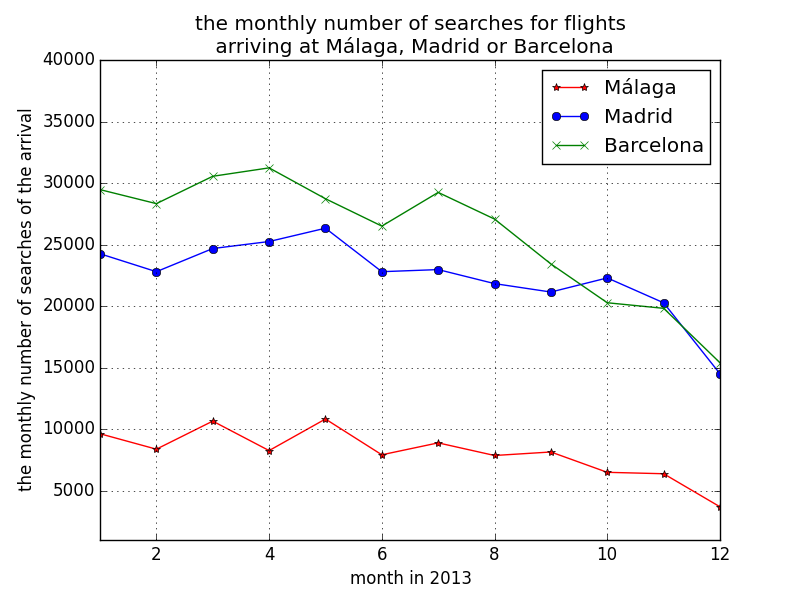

In [6]:
import pandas as pd
import matplotlib.pylab as plt

file_dir = 'C:\\Users\\XIA\\Desktop\\amadeus_test\\data\\searches.csv'
IATAs = ['AGP',  'MAD', 'BCN']

res = monthlySearch(file_dir, IATAs)
res = res.to_dict()

airport = [[] for x in range(len(IATAs))]
chrono = [[] for x in range(len(IATAs))]
for key, value in res.items():
    if(key[0]=='AGP'):
        airport[0].append(value)
        chrono[0].append(key[2])
    elif(key[0]=='MAD'):
        airport[1].append(value)
        chrono[1].append(key[2])
    elif(key[0]=='BCN'):
        airport[2].append(value)
        chrono[2].append(key[2])

AGP = [x for (y,x) in sorted(zip(chrono[0], airport[0]))]
MAD = [x for (y,x) in sorted(zip(chrono[1], airport[1]))]
BCN = [x for (y,x) in sorted(zip(chrono[2], airport[2]))]
x = list(range(1,13))
plt.figure()
plt.grid()
plt.axis([1, 12, 1000, 40000])
plt.title('the monthly number of searches for flights\n arriving at Málaga, Madrid or Barcelona')
plt.xlabel('month in 2013')
plt.ylabel('the monthly number of searches of the arrival')
plt.plot(x, AGP, 'r*-', label='Málaga')
plt.plot(x, MAD, 'bo-', label='Madrid')
plt.plot(x, BCN, 'gx-', label='Barcelona')
plt.legend()
plt.savefig('fig_ex3.png')
from IPython.display import Image
Image(filename='fig_ex3.png') 

# Bonus ex1

A search is approximately considered to be booked when it satisfaits three conditions:
1.the search matches the origin and destination of a booking.
2.the date of the search matches the cre_date of this booking.
3.the pax of this booking is positve.

In [2]:
import pandas as pd
booking = pd.read_csv('C:\\Users\\XIA\\Desktop\\amadeus_test\\data\\bookings.csv', 
                      sep='^', 
                      usecols=['cre_date           ','arr_port','dep_port','pax'])


Perfom some data processing work: remove the espace in the column name, the departure airport and arrival airport; create two columns representing month and day.

In [3]:
booking.columns=[c.replace(' ','') for c in booking.columns]
booking['date'] = pd.to_datetime(booking['cre_date'])
booking['month'] = booking['date'].dt.month
booking['day'] = booking['date'].dt.day
booking = booking.drop('cre_date', axis=1)
booking = booking.drop('date', axis=1)
booking['dep_port'] = booking['dep_port'].apply(lambda s:s.strip())
booking['arr_port'] = booking['arr_port'].apply(lambda s:s.strip())

Define a function which take a row of search as input, it outputs 0 if this search is not booked and 1 if this search is booked. This function will be applied to each row of the dataframe of searches.

In [4]:
def isaSearchBooked(aSearch, booking):
    date = pd.to_datetime(aSearch['Date'])
    month = date.month
    day = date.day
    if(((booking['month']==month)&(booking['day']==day)&(booking['pax']>0))&
       (((booking['dep_port']==aSearch['Seg1Departure'])&(booking['arr_port']==aSearch['Seg1Arrival']))|
      ((booking['dep_port']==aSearch['Seg2Departure'])&(booking['arr_port']==aSearch['Seg2Arrival'])))).any())):
        return 1
    else:
        return 0

An additional column named "isBooked" is added, it indicates whether this search is booked. Searches with additional field are saved in 'SearchesWithAddedField.csv'. 

In [6]:
chunksize = 10**5
chunks = pd.read_csv('C:\\Users\\XIA\\Desktop\\amadeus_test\\data\\searches.csv', sep='^', chunksize=chunksize)
i=0
header=True
for chunk in chunks:
    chunk['isBooked'] = chunk.apply(lambda row: isaSearchBooked(row, booking), axis=1)    
    chunk.index += i*chunksize
    chunk.to_csv('SearchesWithAddedField.csv', mode='a', header=header, index=True)    
    i+=1
    if(i==1):
        header = False

# Bonus ex2

I made this web service in eclipse. I used Java and Tomcat. The interface of this web service is illustrated below, user enters the number n and the directory of the output of the second question. The web service returns the top n airports of the data in Json and saves the data in Json in the same directory.

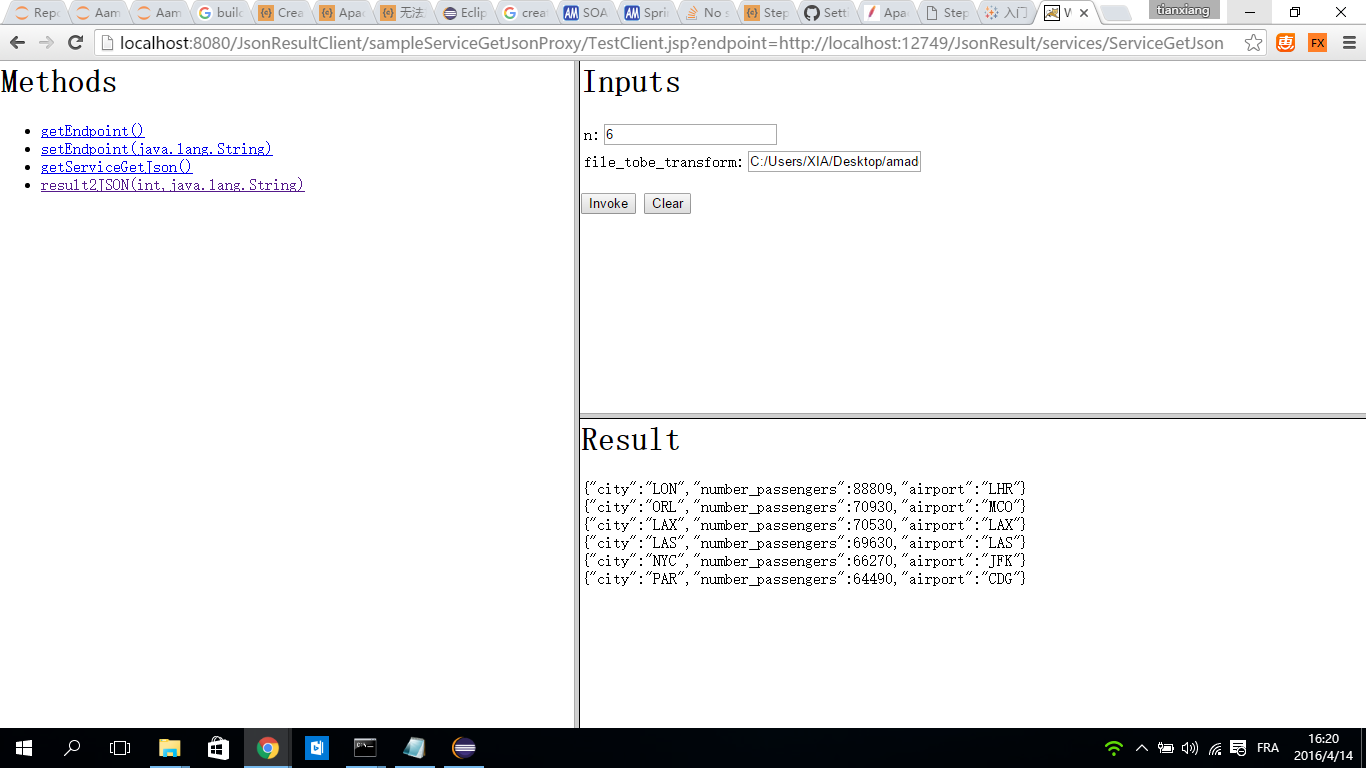

In [7]:
from IPython.display import Image
Image(filename='interface_ws.png') 